In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
import numpy as np
import scipy
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [186]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [187]:
import pandas as pd
df = pd.read_csv("train.csv")
df = df.drop("number_of_dependences", axis=1)

In [188]:
df.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [189]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


### Handling Null Values

In [190]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

In [191]:
df.Employee_type.unique()

array(['RM_type_A', 'RM_type_C', 'RM_type_B', nan], dtype=object)

In [192]:
df.Employee_type = df.Employee_type.fillna(df.Employee_type.mode()[0])

In [193]:
df.Employee_type.unique()

array(['RM_type_A', 'RM_type_C', 'RM_type_B'], dtype=object)

In [194]:
df.Education_level.unique()

array(['level_4', 'level_5', 'level_3', nan, 'level_1', 'level_2',
       'level_0'], dtype=object)

In [195]:
df.Education_level.describe()

count       18397
unique          6
top       level_4
freq        15313
Name: Education_level, dtype: object

In [196]:
edu_null = df.Education_level.loc[df.Education_level.isnull()].index

In [197]:
edu_null

Int64Index([    4,     5,     7,    10,    11,    14,    16,    30,    41,
               42,
            ...
            21968, 21969, 21973, 21985, 21986, 21988, 21989, 21990, 21994,
            22004],
           dtype='int64', length=3608)

In [198]:
df.Education_level.loc[df.Education_level.isnull()] = "missing"

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [199]:
df.Education_level

0        level_4
1        level_4
2        level_5
3        level_3
4        missing
          ...   
22000    level_4
22001    level_4
22002    level_4
22003    level_4
22004    missing
Name: Education_level, Length: 22005, dtype: object

In [200]:
df.Education_level.isnull().sum()

0

In [201]:
gpa_null = df[df.GPA.isnull()].index

In [202]:
gpa_null

Int64Index([    4,     5,     7,    10,    11,    14,    16,    30,    41,
               42,
            ...
            21968, 21969, 21973, 21985, 21986, 21988, 21989, 21990, 21994,
            22004],
           dtype='int64', length=3503)

In [203]:
df["GPA"].loc[df[df.GPA.isnull()].index]

4       NaN
5       NaN
7       NaN
10      NaN
11      NaN
         ..
21988   NaN
21989   NaN
21990   NaN
21994   NaN
22004   NaN
Name: GPA, Length: 3503, dtype: float64

In [204]:
df["GPA"].loc[df["GPA"]>4]

40         7.28
97        48.61
204       45.00
406       45.29
684       32.12
          ...  
20170    378.00
20774     13.43
20804    334.00
21611     47.35
21977    381.00
Name: GPA, Length: 65, dtype: float64

In [205]:
df["GPA_year_null"] = 0

In [206]:
df["GPA_year_null"].loc[df[df.GPA.isnull()].index] = 1

In [207]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached,0


In [208]:
df.GPA.median()

3.09

In [209]:
df.GPA.loc[df[df.GPA.isnull()].index] = df.GPA.median()

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [210]:
df.GPA.isnull().sum()

0

In [211]:
df.GPA

0        2.32
1        3.25
2        3.23
3        0.00
4        3.09
         ... 
22000    2.84
22001    3.28
22002    3.10
22003    3.69
22004    3.09
Name: GPA, Length: 22005, dtype: float64

In [212]:
year_null = df[df.year_graduated.isnull()].index

In [213]:
year_null

Int64Index([    4,     5,     7,    10,    11,    14,    16,    30,    41,
               42,
            ...
            21968, 21969, 21973, 21985, 21986, 21988, 21989, 21990, 21994,
            22004],
           dtype='int64', length=3503)

In [214]:
df.year_graduated.value_counts()

2013    2552
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        440
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
\N        87
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
1993      22
1992      18
2999      17
1987      15
1997      15
1991      14
2019      12
1988      12
1990      11
1989      10
1986       8
1985       8
2201       5
-          4
1983       3
2200       3
1984       2
201        2
____       2
2044       1
3016       1
2031       1
9464       1
102        1
2020       1
Name: year_graduated, dtype: int64

In [215]:
index = df[(df["year_graduated"] == "-")
    |(df["year_graduated"] == "____")
    |(df["year_graduated"].str.contains(r"[N]", na=False))].index

In [216]:
index

Int64Index([   20,    22,   124,   163,   224,   678,   872,   895,  1772,
             2148,  2149,  3899,  4074,  4569,  5135,  5381,  5391,  5488,
             5505,  5547,  5549,  5559,  5566,  5581,  5582,  5587,  5645,
             6066,  6125,  6131,  6232,  6592,  6924,  6934,  7225,  7549,
             8967,  9614, 10082, 10218, 10414, 10550, 10692, 10708, 11083,
            11518, 12112, 12465, 12471, 12482, 12517, 12674, 12920, 13006,
            13259, 13432, 13805, 14076, 14857, 14872, 15178, 15195, 16659,
            16690, 16793, 16991, 17014, 17046, 17145, 17505, 17676, 18587,
            18610, 18853, 19153, 19224, 19227, 19265, 19322, 19381, 19414,
            19556, 19769, 19842, 19946, 20288, 20502, 20610, 21132, 21148,
            21430, 21682, 21974],
           dtype='int64')

In [217]:
df["year_graduated"].loc[index] = "0"

In [218]:
df["year_graduated"].value_counts()

2013    2552
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        533
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
1993      22
1992      18
2999      17
1997      15
1987      15
1991      14
2019      12
1988      12
1990      11
1989      10
1986       8
1985       8
2201       5
2200       3
1983       3
201        2
1984       2
2044       1
2020       1
2031       1
9464       1
102        1
3016       1
Name: year_graduated, dtype: int64

In [219]:
df["year_graduated"].mode()[0]

'2013'

In [220]:
df["year_graduated"].fillna(df["year_graduated"].mode()[0], inplace=True)

In [221]:
df["year_graduated"].isnull().sum()

0

In [222]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                             0
GPA                                         0
year_graduated                              0
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

In [223]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached,0


In [224]:
df["job_duration_as_permanent_worker"].value_counts()

4.0     4290
1.0     3217
6.0     2989
5.0     2873
3.0     2492
2.0     1713
7.0      828
15.0     348
16.0     187
13.0     179
12.0      93
22.0      79
8.0       75
23.0      69
29.0      62
14.0      59
24.0      56
17.0      51
31.0      43
25.0      41
30.0      38
26.0      32
18.0      28
28.0      27
27.0      24
19.0      18
21.0      18
20.0       9
32.0       4
10.0       4
33.0       2
34.0       1
11.0       1
Name: job_duration_as_permanent_worker, dtype: int64

In [225]:
df["job_duration_as_permanent_worker"].median()

4.0

In [226]:
df["Employee_status"].value_counts()

Permanent    19950
Contract      2055
Name: Employee_status, dtype: int64

In [227]:
df["job_duration_as_permanent_worker"][df["job_duration_as_permanent_worker"].isnull()] = 0

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
df["job_duration_as_permanent_worker"].value_counts()

4.0     4290
1.0     3217
6.0     2989
5.0     2873
3.0     2492
0.0     2055
2.0     1713
7.0      828
15.0     348
16.0     187
13.0     179
12.0      93
22.0      79
8.0       75
23.0      69
29.0      62
14.0      59
24.0      56
17.0      51
31.0      43
25.0      41
30.0      38
26.0      32
18.0      28
28.0      27
27.0      24
19.0      18
21.0      18
20.0       9
32.0       4
10.0       4
33.0       2
34.0       1
11.0       1
Name: job_duration_as_permanent_worker, dtype: int64

In [229]:
df["job_duration_as_permanent_worker"].isnull().sum()

0

In [230]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                             0
GPA                                         0
year_graduated                              0
job_duration_as_permanent_worker            0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

In [231]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached,0


In [232]:
df["Avg_achievement_%"] = df["Avg_achievement_%"].div(100)

In [233]:
df["Last_achievement_%"] = df["Last_achievement_%"].div(100)

In [234]:
df["last_over100_achiev_null"] = 0

In [235]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,0,0.688500,0.7253,0.0,achiev_50%-100%,achiev_< 50%,reached,0,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,0,0,0.948100,1.0113,3.0,achiev_50%-100%,achiev_50%-100%,reached,0,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,0,0.728200,0.7130,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,0,0.868900,0.9009,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,1,1,0.951700,1.0072,2.0,achiev_< 50%,achiev_> 1.5,not_reached,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,0,0.717767,0.7553,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,2,0,1.088567,1.1165,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0,0,0.763667,0.7965,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached,0,0


In [236]:
avg_achiev_null = df[df["Avg_achievement_%"].isnull()].index

In [237]:
last_achiev_null = df[df["Last_achievement_%"].isnull()].index

In [238]:
above100_achiev_null = df[df["Achievement_above_100%_during3quartal"].isnull()].index

In [239]:
df["last_over100_achiev_null"].loc[last_achiev_null] = 1

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [240]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,0,0.688500,0.7253,0.0,achiev_50%-100%,achiev_< 50%,reached,0,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,0,0,0.948100,1.0113,3.0,achiev_50%-100%,achiev_50%-100%,reached,0,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,0,0.728200,0.7130,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,0,0.868900,0.9009,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,1,1,0.951700,1.0072,2.0,achiev_< 50%,achiev_> 1.5,not_reached,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,0,0.717767,0.7553,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,2,0,1.088567,1.1165,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0,0,0.763667,0.7965,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached,0,0


In [241]:
df["Last_achievement_%"].describe()

count    15703.000000
mean         0.714208
std          0.240955
min          0.042600
25%          0.559350
50%          0.714100
75%          0.883500
max          1.300000
Name: Last_achievement_%, dtype: float64

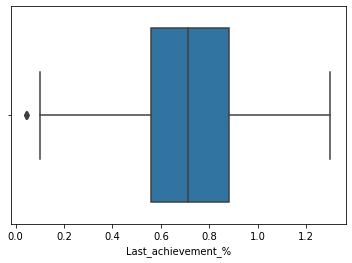

In [242]:
sns.boxplot("Last_achievement_%", data=df)

In [243]:
df["Last_achievement_%"].fillna(df["Last_achievement_%"].median(), inplace=True)

In [244]:
df["Achievement_above_100%_during3quartal"].describe()

count    15703.000000
mean         0.682991
std          1.107861
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Achievement_above_100%_during3quartal, dtype: float64

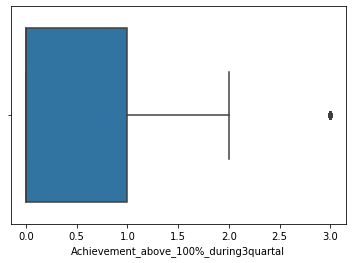

In [245]:
sns.boxplot("Achievement_above_100%_during3quartal", data=df)

In [246]:
df["Achievement_above_100%_during3quartal"].fillna(df["Achievement_above_100%_during3quartal"].median(), inplace=True)

In [247]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                             0
GPA                                         0
year_graduated                              0
job_duration_as_permanent_worker            0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

In [248]:
target1_null = df["achievement_target_1"].loc[df["achievement_target_1"].isnull()].index

In [249]:
target2_null = df["achievement_target_2"].loc[df["achievement_target_2"].isnull()].index

In [250]:
target3_null = df["achievement_target_3"].loc[df["achievement_target_3"].isnull()].index

In [251]:
df["achieve_target_null"] = 0

In [252]:
df["achieve_target_null"].loc[target1_null] = 1

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [253]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,0.688500,0.7253,0.0,achiev_50%-100%,achiev_< 50%,reached,0,0,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,0,0.948100,1.0113,3.0,achiev_50%-100%,achiev_50%-100%,reached,0,0,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,0.728200,0.7130,0.0,achiev_100%-150%,achiev_< 50%,not_reached,0,0,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,0.868900,0.9009,2.0,achiev_50%-100%,achiev_50%-100%,not_reached,0,0,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,1,0.951700,1.0072,2.0,achiev_< 50%,achiev_> 1.5,not_reached,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0,0.717767,0.7553,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0,0,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0,NaN,0.7141,0.0,NaN,NaN,NaN,0,1,1
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,0,1.088567,1.1165,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached,0,0,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0,0.763667,0.7965,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached,0,0,0


In [254]:
df.achievement_target_1.replace(['achiev_< 50%', 'achiev_50%-100%', 'achiev_100%-150%', 'achiev_> 1.5', 'Tidak diberikan target'],
                                ['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'], inplace=True)

df.achievement_target_1.replace(['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'],
                                ['Pencapaian(1) < 50%', 'Pencapaian(1) 50%-100%', 'Pencapaian(1) 100%-150%', 'Pencapaian(1) > 1.5', 'no_target(1)'], inplace=True)

In [255]:
df.achievement_target_2.replace(['achiev_< 50%', 'achiev_50%-100%', 'achiev_100%-150%', 'achiev_> 1.5', 'Tidak diberikan target'],
                                ['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'], inplace=True)

df.achievement_target_2.replace(['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'],
                                ['Pencapaian(2) < 50%', 'Pencapaian(2) 50%-100%', 'Pencapaian(2) 100%-150%', 'Pencapaian(2) > 1.5', 'no_target(2)'], inplace=True)

In [256]:
df.achievement_target_1.mode()

0    Pencapaian(1) 50%-100%
dtype: object

In [257]:
df.achievement_target_2.mode()

0    Pencapaian(2) < 50%
dtype: object

In [258]:
df.achievement_target_1.fillna(df.achievement_target_1.mode()[0],inplace=True)
df.achievement_target_2.fillna(df.achievement_target_2.mode()[0],inplace=True)

In [259]:
df.achievement_target_3.replace(["not_reached"], ["not reached"], inplace=True)

In [260]:
df.achievement_target_3.fillna(df.achievement_target_3.mode()[0], inplace=True)

In [261]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                             0
GPA                                         0
year_graduated                              0
job_duration_as_permanent_worker            0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

In [262]:
df["avg_achiev_null"] = 0

In [263]:
df["avg_achiev_null"].loc[avg_achiev_null] = 1

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [264]:
df["Avg_achievement_%"].fillna(df["Avg_achievement_%"].median(),inplace=True)

In [265]:
df.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
Employee_status                          0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Best Performance                         0
Avg_achieve

In [266]:
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0.688500,0.7253,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,0,0,0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,0.948100,1.0113,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0.728200,0.7130,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) < 50%,not reached,0,0,0,0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0.868900,0.9009,2.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,not reached,0,0,0,0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,0.951700,1.0072,2.0,Pencapaian(1) < 50%,Pencapaian(2) > 1.5,not reached,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0.717767,0.7553,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0.663108,0.7141,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,1,1,1
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,1.088567,1.1165,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0.763667,0.7965,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) 50%-100%,not reached,0,0,0,0


In [267]:
df.to_csv("cleaned_data1.csv", index=False)

## Handling Categorical Features

In [268]:
df.select_dtypes(include="object")

,job_level,person_level,Employee_type,Employee_status,gender,marital_status_maried(Y/N),Education_level,year_graduated,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,PG06,RM_type_A,Permanent,Female,Y,level_4,1987,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached
1,JG04,PG04,RM_type_A,Permanent,Male,Y,level_4,2001,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached
2,JG04,PG03,RM_type_A,Permanent,Male,Y,level_5,2007,Pencapaian(1) 100%-150%,Pencapaian(2) < 50%,not reached
3,JG04,PG04,RM_type_A,Permanent,Male,Y,level_3,2006,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,not reached
4,JG04,PG03,RM_type_A,Permanent,Male,Y,missing,2013,Pencapaian(1) < 50%,Pencapaian(2) > 1.5,not reached
...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,PG03,RM_type_B,Permanent,Male,Y,level_4,2009,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached
22001,JG03,PG01,RM_type_B,Contract,Male,N,level_4,2014,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached
22002,JG04,PG03,RM_type_A,Permanent,Male,Y,level_4,2006,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached
22003,JG04,PG03,RM_type_A,Permanent,Male,Y,level_4,2010,Pencapaian(1) 100%-150%,Pencapaian(2) 50%-100%,not reached


In [269]:
df.select_dtypes(include="object").columns

Index(['job_level', 'person_level', 'Employee_type', 'Employee_status',
       'gender', 'marital_status_maried(Y/N)', 'Education_level',
       'year_graduated', 'achievement_target_1', 'achievement_target_2',
       'achievement_target_3'],
      dtype='object')

In [270]:
df_copy = df.copy()

In [271]:
job_level_effect = df_copy.groupby('job_level')['Best Performance'].mean().sort_values(ascending=False).reset_index()

In [272]:
job_level_effect

,job_level,Best Performance
0,JG05,0.150588
1,JG04,0.131903
2,JG03,0.006533
3,JG06,0.000000


In [273]:
job_level_effect["Label"]=[3,2,1,0]
job_level_effect

,job_level,Best Performance,Label
0,JG05,0.150588,3
1,JG04,0.131903,2
2,JG03,0.006533,1
3,JG06,0.000000,0


In [274]:
new_joblevel_dict = dict(job_level_effect[["job_level", "Label"]].values)
new_joblevel_dict

{'JG05': 3, 'JG04': 2, 'JG03': 1, 'JG06': 0}

In [275]:
df_copy = df_copy.replace({"job_level": new_joblevel_dict})

In [276]:
df_copy.person_level.value_counts()

PG03    18342
PG01     1946
PG04      807
PG06      478
PG05      364
PG02       41
PG07       24
PG08        3
Name: person_level, dtype: int64

In [277]:
person_level_effect = df_copy.groupby("person_level")["Best Performance"].mean().sort_values(ascending=False).reset_index()

In [278]:
person_level_effect

,person_level,Best Performance
0,PG08,0.333333
1,PG07,0.166667
2,PG06,0.163180
3,PG04,0.147460
4,PG03,0.131229
5,PG05,0.126374
6,PG02,0.097561
7,PG01,0.004625


In [279]:
[i for i in range(person_level_effect.shape[0]-1,-1,-1)]

[7, 6, 5, 4, 3, 2, 1, 0]

In [280]:
person_level_effect["Label"] = [i for i in range(person_level_effect.shape[0]-1,-1,-1)]

In [281]:
person_level_effect

,person_level,Best Performance,Label
0,PG08,0.333333,7
1,PG07,0.166667,6
2,PG06,0.163180,5
3,PG04,0.147460,4
4,PG03,0.131229,3
5,PG05,0.126374,2
6,PG02,0.097561,1
7,PG01,0.004625,0


In [282]:
new_personlevel_dict = dict(person_level_effect[["person_level", "Label"]].values)
new_personlevel_dict

{'PG08': 7,
 'PG07': 6,
 'PG06': 5,
 'PG04': 4,
 'PG03': 3,
 'PG05': 2,
 'PG02': 1,
 'PG01': 0}

In [283]:
df_copy = df_copy.replace({"person_level": new_personlevel_dict})

In [284]:
df_copy

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,3,8.00,5,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0.688500,0.7253,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,0,0,0
1,2,5.17,4,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,0.948100,1.0113,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
2,2,1.83,3,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0.728200,0.7130,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) < 50%,not reached,0,0,0,0
3,2,7.92,4,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0.868900,0.9009,2.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,not reached,0,0,0,0
4,2,1.83,3,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,0.951700,1.0072,2.0,Pencapaian(1) < 50%,Pencapaian(2) > 1.5,not reached,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,2,1.50,3,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,...,0.717767,0.7553,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22001,1,0.42,0,0.42,0.42,RM_type_B,Contract,Male,1991,N,...,0.663108,0.7141,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,1,1,1
22002,2,1.50,3,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,...,1.088567,1.1165,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22003,2,1.50,3,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,...,0.763667,0.7965,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) 50%-100%,not reached,0,0,0,0


In [285]:
def target_guided_encode(columns):
    for column in columns:
        df_copy1 = df_copy.copy()
        column_effect = df_copy1.groupby(column)['Best Performance'].mean().sort_values(ascending=False).reset_index()
        column_effect["Label"] = [i for i in range(column_effect.shape[0]-1,-1,-1)]
        new_column_dict = dict(column_effect[[column, "Label"]].values)
        df_copy1 = df_copy1.replace({column: new_column_dict})
        return df_copy1

In [286]:
def one_hot_encode(columns):
    df_encode = df_copy.copy()
    for column in columns:
        dummy = pd.get_dummies(df_encode[column], drop_first=True)
        df_encode = df_encode.drop(column, axis=1)
        df_encode = pd.concat([dummy, df_encode], axis=1)
    return df_encode

In [287]:
df_copy = one_hot_encode(["Employee_type"])

In [288]:
df_copy

,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_status,gender,age,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,0,0,3,8.00,5,8.00,0.50,Permanent,Female,1964,...,0.688500,0.7253,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,0,0,0
1,0,0,2,5.17,4,2.00,1.25,Permanent,Male,1979,...,0.948100,1.0113,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
2,0,0,2,1.83,3,1.83,1.50,Permanent,Male,1980,...,0.728200,0.7130,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) < 50%,not reached,0,0,0,0
3,0,0,2,7.92,4,4.00,0.17,Permanent,Male,1984,...,0.868900,0.9009,2.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,not reached,0,0,0,0
4,0,0,2,1.83,3,1.83,2.08,Permanent,Male,1984,...,0.951700,1.0072,2.0,Pencapaian(1) < 50%,Pencapaian(2) > 1.5,not reached,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,0,2,1.50,3,1.50,3.42,Permanent,Male,1986,...,0.717767,0.7553,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22001,1,0,1,0.42,0,0.42,0.42,Contract,Male,1991,...,0.663108,0.7141,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,1,1,1
22002,0,0,2,1.50,3,1.50,0.00,Permanent,Male,1983,...,1.088567,1.1165,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22003,0,0,2,1.50,3,1.50,0.00,Permanent,Male,1988,...,0.763667,0.7965,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) 50%-100%,not reached,0,0,0,0


In [291]:
df_copy = one_hot_encode(["Employee_status"])

KeyError: 'Employee_status'

In [292]:
df_copy

,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,1,0,0,3,8.00,5,8.00,0.50,Female,1964,...,0.688500,0.7253,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,0,0,0
1,1,0,0,2,5.17,4,2.00,1.25,Male,1979,...,0.948100,1.0113,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
2,1,0,0,2,1.83,3,1.83,1.50,Male,1980,...,0.728200,0.7130,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) < 50%,not reached,0,0,0,0
3,1,0,0,2,7.92,4,4.00,0.17,Male,1984,...,0.868900,0.9009,2.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,not reached,0,0,0,0
4,1,0,0,2,1.83,3,1.83,2.08,Male,1984,...,0.951700,1.0072,2.0,Pencapaian(1) < 50%,Pencapaian(2) > 1.5,not reached,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,0,2,1.50,3,1.50,3.42,Male,1986,...,0.717767,0.7553,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22001,0,1,0,1,0.42,0,0.42,0.42,Male,1991,...,0.663108,0.7141,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,1,1,1
22002,1,0,0,2,1.50,3,1.50,0.00,Male,1983,...,1.088567,1.1165,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22003,1,0,0,2,1.50,3,1.50,0.00,Male,1988,...,0.763667,0.7965,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) 50%-100%,not reached,0,0,0,0


In [293]:
df_copy = one_hot_encode(["gender"])

In [108]:
df_copy

,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,0,1,0,0,3,8.00,5,8.00,0.50,1964,...,0.688500,0.7253,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,0,0,0
1,1,1,0,0,2,5.17,4,2.00,1.25,1979,...,0.948100,1.0113,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
2,1,1,0,0,2,1.83,3,1.83,1.50,1980,...,0.728200,0.7130,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) < 50%,not reached,0,0,0,0
3,1,1,0,0,2,7.92,4,4.00,0.17,1984,...,0.868900,0.9009,2.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,not reached,0,0,0,0
4,1,1,0,0,2,1.83,3,1.83,2.08,1984,...,0.951700,1.0072,2.0,Pencapaian(1) < 50%,Pencapaian(2) > 1.5,not reached,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,0,2,1.50,3,1.50,3.42,1986,...,0.717767,0.7553,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22001,1,0,1,0,1,0.42,0,0.42,0.42,1991,...,0.663108,0.7141,0.0,Pencapaian(1) 50%-100%,Pencapaian(2) < 50%,reached,0,1,1,1
22002,1,1,0,0,2,1.50,3,1.50,0.00,1983,...,1.088567,1.1165,3.0,Pencapaian(1) 50%-100%,Pencapaian(2) 50%-100%,reached,0,0,0,0
22003,1,1,0,0,2,1.50,3,1.50,0.00,1988,...,0.763667,0.7965,0.0,Pencapaian(1) 100%-150%,Pencapaian(2) 50%-100%,not reached,0,0,0,0


In [294]:
df_copy = one_hot_encode(["marital_status_maried(Y/N)"])

In [295]:
df_copy = target_guided_encode(["Education_level"])

In [296]:
df_copy = target_guided_encode(["achievement_target_1"])

In [297]:
df_copy = target_guided_encode(["achievement_target_2"])

In [298]:
df_copy = target_guided_encode(["achievement_target_3"])

In [299]:
df_copy["year_graduated"] = df_copy["year_graduated"].astype(int)

In [300]:
df_copy.select_dtypes(include="object").columns

Index([], dtype='object')

In [301]:
df_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,1,0,1,0,0,3,8.00,5,8.00,0.50,...,0.688500,0.7253,0.0,0,0,0,0,0,0,0
1,1,1,1,0,0,2,5.17,4,2.00,1.25,...,0.948100,1.0113,3.0,0,3,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.728200,0.7130,0.0,1,0,1,0,0,0,0
3,1,1,1,0,0,2,7.92,4,4.00,0.17,...,0.868900,0.9009,2.0,0,3,1,0,0,0,0
4,1,1,1,0,0,2,1.83,3,1.83,2.08,...,0.951700,1.0072,2.0,3,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,1,0,2,1.50,3,1.50,3.42,...,0.717767,0.7553,0.0,0,3,0,0,0,0,0
22001,0,1,0,1,0,1,0.42,0,0.42,0.42,...,0.663108,0.7141,0.0,0,0,0,0,1,1,1
22002,1,1,1,0,0,2,1.50,3,1.50,0.00,...,1.088567,1.1165,3.0,0,3,0,0,0,0,0
22003,1,1,1,0,0,2,1.50,3,1.50,0.00,...,0.763667,0.7965,0.0,1,3,1,0,0,0,0


### TEST DATASET 1

In [302]:
test = pd.read_csv("test.csv")
test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.50,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.00,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.50,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.50,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG03,2.75,PG01,2.75,2.75,RM_type_B,Permanent,Male,1987,N,...,1,0,1,0,49.396667,50.71,0.0,achiev_50%-100%,achiev_< 50%,not reached
5996,JG04,1.17,PG03,1.17,0.50,RM_type_B,Permanent,Male,1987,Y,...,3,0,0,0,76.590000,77.70,0.0,achiev_50%-100%,achiev_< 50%,reached
5997,JG04,1.83,PG03,1.83,1.92,RM_type_A,Permanent,Male,1986,Y,...,3,0,3,0,97.906667,111.49,3.0,achiev_100%-150%,achiev_100%-150%,reached
5998,JG04,1.92,PG03,1.92,1.25,RM_type_A,Permanent,Male,1984,Y,...,3,0,1,0,82.833333,81.64,0.0,achiev_100%-150%,achiev_50%-100%,not reached


In [303]:
test["job_level"].unique()

array(['JG05', 'JG04', 'JG03'], dtype=object)

In [304]:
new_joblevel_dict

{'JG05': 3, 'JG04': 2, 'JG03': 1, 'JG06': 0}

In [305]:
test = test.replace({"job_level": new_joblevel_dict})

In [306]:
test["job_level"].unique()

array([3, 2, 1], dtype=int64)

In [307]:
new_personlevel_dict

{'PG08': 7,
 'PG07': 6,
 'PG06': 5,
 'PG04': 4,
 'PG03': 3,
 'PG05': 2,
 'PG02': 1,
 'PG01': 0}

In [308]:
test = test.replace({"person_level": new_personlevel_dict})

In [309]:
test["person_level"].unique()

array([2, 3, 5, 4, 0, 1, 6], dtype=int64)

In [310]:
def one_hot_test_encode(columns):
    df_encode = test.copy()
    for column in columns:
        dummy = pd.get_dummies(test[column], drop_first=True)
        df_encode = df_encode.drop(column, axis=1)
        df_encode = pd.concat([dummy, df_encode], axis=1)
    return df_encode

In [311]:
test["Employee_type"].unique()

array(['RM_type_C', 'RM_type_A', 'RM_type_B'], dtype=object)

In [312]:
test = one_hot_test_encode(["Employee_type"])

In [313]:
test["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [314]:
test = one_hot_test_encode(["gender"])

In [315]:
test['marital_status_maried(Y/N)'].unique()

array(['Y', 'N'], dtype=object)

In [316]:
test = one_hot_test_encode(["marital_status_maried(Y/N)"])

In [317]:
test["Education_level"].unique()

array(['level_3', 'level_4', 'level_5', 'level_1', 'level_0', 'level_2'],
      dtype=object)

In [318]:
edu_label_dict = {'level_0': 1,
 'level_1': 6,
 'level_2': 0,
 'level_3': 3,
 'level_4': 2,
 'level_5': 5,
 "missing": 4}

In [319]:
test = test.replace({"Education_level": edu_label_dict})

In [320]:
test["Education_level"].unique()

array([3, 2, 5, 6, 1, 0], dtype=int64)

In [321]:
test["year_graduated"].unique()

array(['2004', '2011', '\\N', '2008', '1999', '2006', '2015', '2014',
       '2010', '9999', '2012', '2009', '2003', '2007', '2005', '2013',
       '207', '0', '1998', '3.05', '2002', '1989', '2016', '3.18', '2001',
       '2201', '2000', '1993', '1992', '1990', '1995', '1996', '2999',
       '2018', '1997', '209', '1994', '1991', '1016', '1986', '2017',
       '1982', '1984', '1988', '2019', '1983', '1985', '1987', '.',
       '3013'], dtype=object)

In [322]:
test["year_graduated"].value_counts()

2011    893
2010    779
2012    707
2009    664
2008    529
2013    483
2007    331
2014    301
2006    209
2005    161
2004    146
2003    137
2002    102
0        81
2015     76
2001     68
9999     38
2000     33
\N       31
1999     25
1996     24
2016     19
1998     15
1994     14
1995     13
2017     13
1986     12
1988     10
1989      9
1993      9
1985      8
1987      8
2999      7
1997      7
2018      5
1992      5
1990      4
2201      4
1984      4
1991      4
2019      3
3013      1
3.18      1
209       1
1982      1
3.05      1
1016      1
.         1
207       1
1983      1
Name: year_graduated, dtype: int64

In [323]:
df_copy["year_graduated"].unique()

array([1987, 2001, 2007, 2006, 2013, 2008, 2011, 2010, 2014,    0, 1996,
       2009, 2005, 2012, 1989, 1992, 2000, 1994, 1997, 1993, 1995, 2004,
       2015, 1986, 1999, 2003, 2016, 2044, 2018, 1991, 2002, 2017, 2201,
       1998, 1990, 9999, 1984, 2020, 1988, 1983, 1985,  201, 2019, 2031,
       3016, 2200,  102, 2999, 9464])

In [324]:
weird_index = test[(test["year_graduated"] == ".")
    |(test["year_graduated"] == "3.18")
    |(test["year_graduated"] == "3.05")
    |(test["year_graduated"].str.contains(r"[N]", na=False))].index

In [325]:
test["year_graduated"].loc[weird_index] = "0"

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [326]:
test["year_graduated"] = test["year_graduated"].astype(int)

In [327]:
test["achievement_target_1"].unique()

array(['achiev_50%-100%', 'Pencapaian < 50%', 'Pencapaian 50%-100%',
       'achiev_100%-150%', 'achiev_< 50%', 'Tidak diberikan target',
       'Pencapaian 100%-150%', 'achiev_> 1.5', 'Pencapaian > 1.5'],
      dtype=object)

In [328]:
test.achievement_target_1.replace(['achiev_< 50%', 'achiev_50%-100%', 'achiev_100%-150%', 'achiev_> 1.5', 'Tidak diberikan target'],
                                ['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'], inplace=True)

test.achievement_target_1.replace(['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'],
                                ['Pencapaian(1) < 50%', 'Pencapaian(1) 50%-100%', 'Pencapaian(1) 100%-150%', 'Pencapaian(1) > 1.5', 'no_target(1)'], inplace=True)

In [329]:
test["achievement_target_1"].unique()

array(['Pencapaian(1) 50%-100%', 'Pencapaian(1) < 50%',
       'Pencapaian(1) 100%-150%', 'no_target(1)', 'Pencapaian(1) > 1.5'],
      dtype=object)

In [330]:
achiev1_label_dict = {'Pencapaian(1) < 50%': 3,
 'Pencapaian(1) 50%-100%': 0,
 'Pencapaian(1) 100%-150%': 1,
 'Pencapaian(1) > 1.5': 2,
 'no_target(1)': 4}

In [331]:
test = test.replace({"achievement_target_1": achiev1_label_dict})

In [332]:
test["achievement_target_2"].unique()

array(['achiev_< 50%', 'Pencapaian < 50%', 'Pencapaian > 1.5',
       'achiev_50%-100%', 'achiev_100%-150%', 'achiev_> 1.5',
       'Pencapaian 50%-100%', 'Pencapaian 100%-150%',
       'Tidak diberikan target'], dtype=object)

In [333]:
test.achievement_target_2.replace(['achiev_< 50%', 'achiev_50%-100%', 'achiev_100%-150%', 'achiev_> 1.5', 'Tidak diberikan target'],
                                ['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'], inplace=True)

test.achievement_target_2.replace(['Pencapaian < 50%', 'Pencapaian 50%-100%', 'Pencapaian 100%-150%', 'Pencapaian > 1.5', 'no_target'],
                                ['Pencapaian(2) < 50%', 'Pencapaian(2) 50%-100%', 'Pencapaian(2) 100%-150%', 'Pencapaian(2) > 1.5', 'no_target(2)'], inplace=True)

In [334]:
test["achievement_target_2"].unique()

array(['Pencapaian(2) < 50%', 'Pencapaian(2) > 1.5',
       'Pencapaian(2) 50%-100%', 'Pencapaian(2) 100%-150%',
       'no_target(2)'], dtype=object)

In [335]:
achiev2_label_dict = {'Pencapaian(2) < 50%': 0,
 'Pencapaian(2) 50%-100%': 3,
 'Pencapaian(2) 100%-150%': 2,
 'Pencapaian(2) > 1.5': 4,
 'no_target(2)': 1}

In [336]:
test = test.replace({"achievement_target_2": achiev2_label_dict})

In [337]:
test["achievement_target_3"].unique()

array(['reached', 'not reached', 'not_reached'], dtype=object)

In [338]:
test.achievement_target_3.replace(["not_reached"], ["not reached"], inplace=True)

In [339]:
test["achievement_target_3"].unique()

array(['reached', 'not reached'], dtype=object)

In [340]:
achiev3_label_dict = {'reached': 0,
 'not reached': 1}

In [341]:
test = test.replace({"achievement_target_3": achiev3_label_dict})

In [342]:
test["Employee_status"].unique()

array(['Permanent'], dtype=object)

In [343]:
test["Permanent"] = 1

In [344]:
test.drop("Employee_status", axis=1, inplace=True)

In [345]:
test.drop("number_of_dependences", axis=1, inplace=True)

In [346]:
test["GPA_year_null"] = 0

In [347]:
test["last_over100_achiev_null"] = 0

In [348]:
test["achieve_target_null"] = 0

In [349]:
test["avg_achiev_null"] = 0

In [350]:
df_copy = df_copy[[i for i in df_copy if i not in ["Best Performance"]] + ["Best Performance"]]

In [351]:
df_copy.columns

Index(['Y', 'Male', 'Permanent', 'RM_type_B', 'RM_type_C', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'Education_level', 'GPA',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'GPA_year_null',
       'last_over100_achiev_null', 'achieve_target_null', 'avg_achiev_null',
       'Best Performance'],
      dtype='object')

In [352]:
test = test[list(df_copy.columns[:-1])]

In [353]:
test

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,1,0,1,0,1,3,1.42,2,1.42,0.50,...,79.506667,94.17,1.0,0,0,0,0,0,0,0
1,0,1,1,0,0,2,1.58,3,1.58,2.00,...,54.283333,42.97,0.0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,43.016667,44.28,0.0,0,0,0,0,0,0,0
3,1,1,1,0,0,3,8.00,5,5.00,1.50,...,74.390000,80.93,0.0,0,0,1,0,0,0,0
4,1,0,1,0,0,2,1.92,3,1.92,0.50,...,106.376667,109.09,3.0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,1,1,0,1,2.75,0,2.75,2.75,...,49.396667,50.71,0.0,0,0,1,0,0,0,0
5996,1,1,1,1,0,2,1.17,3,1.17,0.50,...,76.590000,77.70,0.0,0,0,0,0,0,0,0
5997,1,1,1,0,0,2,1.83,3,1.83,1.92,...,97.906667,111.49,3.0,1,2,0,0,0,0,0
5998,1,1,1,0,0,2,1.92,3,1.92,1.25,...,82.833333,81.64,0.0,1,3,1,0,0,0,0


In [354]:
df_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null,Best Performance
0,1,0,1,0,0,3,8.00,5,8.00,0.50,...,0.7253,0.0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,2,5.17,4,2.00,1.25,...,1.0113,3.0,0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.7130,0.0,1,0,1,0,0,0,0,0
3,1,1,1,0,0,2,7.92,4,4.00,0.17,...,0.9009,2.0,0,3,1,0,0,0,0,0
4,1,1,1,0,0,2,1.83,3,1.83,2.08,...,1.0072,2.0,3,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,1,0,2,1.50,3,1.50,3.42,...,0.7553,0.0,0,3,0,0,0,0,0,0
22001,0,1,0,1,0,1,0.42,0,0.42,0.42,...,0.7141,0.0,0,0,0,0,1,1,1,0
22002,1,1,1,0,0,2,1.50,3,1.50,0.00,...,1.1165,3.0,0,3,0,0,0,0,0,0
22003,1,1,1,0,0,2,1.50,3,1.50,0.00,...,0.7965,0.0,1,3,1,0,0,0,0,0


In [355]:
df_copy.to_csv("cleaned_data2.csv", index=False)

In [356]:
test.to_csv("cleaned_test1.csv", index=False)

## HANDLING ORDINAL FEATURES

In [172]:
df_copy = [df.select_dtypes(include="object").columns]

In [183]:
df_copy

[Index(['job_level', 'person_level', 'Employee_type', 'Employee_status',
        'gender', 'marital_status_maried(Y/N)', 'Education_level',
        'year_graduated', 'achievement_target_1', 'achievement_target_2',
        'achievement_target_3'],
       dtype='object')]

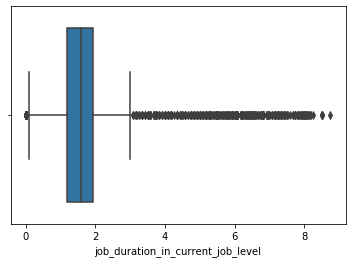

In [357]:
sns.boxplot(df_copy["job_duration_in_current_job_level"])

In [358]:
df_copy['GPA'].describe()

count    22005.000000
mean         3.009789
std         10.727506
min          0.000000
25%          2.900000
50%          3.090000
75%          3.250000
max        381.000000
Name: GPA, dtype: float64

In [359]:
IQR = df_copy['GPA'].quantile(0.75) - df_copy['GPA'].quantile(0.25)
IQR

0.3500000000000001

In [360]:
lower_boundary = df_copy['GPA'].quantile(0.25) - (1.5*IQR)
lower_boundary

2.375

In [361]:
upper_boundary = df_copy['GPA'].quantile(0.75) + (1.5*IQR)
upper_boundary

3.7750000000000004

In [362]:
df_copy['GPA'].loc[df_copy['GPA'] > upper_boundary] = upper_boundary

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [363]:
df_copy['age'].describe()

count    22005.000000
mean      1987.398682
std          4.274737
min       1963.000000
25%       1986.000000
50%       1988.000000
75%       1990.000000
max       2017.000000
Name: age, dtype: float64

In [364]:
IQR = df_copy['age'].quantile(0.75) - df_copy['age'].quantile(0.25)
print(IQR)
lower_boundary = df_copy['age'].quantile(0.25) - (3*IQR)
print(lower_boundary)
upper_boundary = df_copy['age'].quantile(0.75) + (3*IQR)
print(upper_boundary)

4.0
1974.0
2002.0


In [365]:
df_copy['age'][df_copy['age'] > upper_boundary] = 2002

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\anaconda\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [366]:
df_copy['age'].unique()

array([1964, 1979, 1980, 1984, 1986, 1987, 1988, 1983, 1989, 1990, 1991,
       1971, 1969, 1970, 1985, 1992, 1994, 1993, 1975, 1966, 1974, 1968,
       1982, 1973, 1995, 1965, 1977, 1981, 1976, 1967, 1972, 1978, 1963,
       1997, 1996, 2002, 1998], dtype=int64)

In [367]:
df_copy['age'].value_counts()

1989    3036
1988    2973
1990    2656
1987    2541
1991    1970
1986    1926
1985    1303
1992    1249
1984     879
1993     641
1983     563
1982     338
1981     273
1980     252
1994     250
1979     175
1978     157
1977     107
1976      86
1975      65
1995      61
1968      55
1974      54
1973      54
1970      51
1971      50
1972      48
1969      44
1965      36
1967      35
1964      27
1966      27
1996      12
1963       6
1997       3
2002       1
1998       1
Name: age, dtype: int64

In [368]:
def target_guided_encode(columns):
    for column in columns:
        df_copy1 = df_copy.copy()
        column_effect = df_copy1.groupby(column)['Best Performance'].mean().sort_values(ascending=False).reset_index()
        column_effect["Label"] = [i for i in range(column_effect.shape[0]-1,-1,-1)]
        print(column_effect)
        new_column_dict = dict(column_effect[[column, "Label"]].values)
        print(new_column_dict)
        df_copy1 = df_copy1.replace({column: new_column_dict})
        return df_copy1

In [369]:
df_copy = target_guided_encode(["age"])

     age  Best Performance  Label
0   1966          0.296296     36
1   1975          0.261538     35
2   1968          0.236364     34
3   1970          0.235294     33
4   1964          0.222222     32
5   1969          0.204545     31
6   1971          0.200000     30
7   1967          0.200000     29
8   1974          0.185185     28
9   1976          0.174419     27
10  1963          0.166667     26
11  1973          0.166667     25
12  1972          0.166667     24
13  1982          0.156805     23
14  1984          0.146758     22
15  1985          0.146585     21
16  1980          0.142857     20
17  1981          0.142857     19
18  1987          0.142070     18
19  1965          0.138889     17
20  1983          0.138544     16
21  1988          0.137571     15
22  1986          0.132399     14
23  1977          0.130841     13
24  1979          0.125714     12
25  1989          0.121212     11
26  1978          0.121019     10
27  1990          0.103539      9
28  1996      

In [370]:
df_copy["age"].unique()

array([32, 12, 20, 22, 14, 18, 15, 16, 11,  9,  7, 30, 31, 33, 21,  6,  3,
        5, 35, 36, 28, 34, 23, 25,  4, 17, 13, 19, 27, 29, 24, 10, 26,  2,
        8,  0,  1], dtype=int64)

In [371]:
df_copy['year_graduated'].unique()

array([1987, 2001, 2007, 2006, 2013, 2008, 2011, 2010, 2014,    0, 1996,
       2009, 2005, 2012, 1989, 1992, 2000, 1994, 1997, 1993, 1995, 2004,
       2015, 1986, 1999, 2003, 2016, 2044, 2018, 1991, 2002, 2017, 2201,
       1998, 1990, 9999, 1984, 2020, 1988, 1983, 1985,  201, 2019, 2031,
       3016, 2200,  102, 2999, 9464])

In [372]:
df_copy['year_graduated'].value_counts()

2013    6055
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        533
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
1993      22
1992      18
2999      17
1997      15
1987      15
1991      14
1988      12
2019      12
1990      11
1989      10
1985       8
1986       8
2201       5
2200       3
1983       3
201        2
1984       2
2020       1
102        1
3016       1
9464       1
2044       1
2031       1
Name: year_graduated, dtype: int64

In [373]:
IQR = df_copy['year_graduated'].quantile(0.75) - df_copy['year_graduated'].quantile(0.25)
print(IQR)
lower_boundary = df_copy['year_graduated'].quantile(0.25) - (3*IQR)
print(lower_boundary)
upper_boundary = df_copy['year_graduated'].quantile(0.75) + (1.5*IQR)
print(upper_boundary)

4.0
1997.0
2019.0


In [374]:
df_copy['year_graduated'][df_copy['year_graduated'] > upper_boundary] = 2025

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [375]:
df_copy['year_graduated'][(df_copy['year_graduated'] == 0)
        |(df_copy['year_graduated'] == 201)
        |(df_copy['year_graduated'] == 102)] = 1997

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [376]:
df_copy["year_graduated"].unique()

array([1987, 2001, 2007, 2006, 2013, 2008, 2011, 2010, 2014, 1997, 1996,
       2009, 2005, 2012, 1989, 1992, 2000, 1994, 1993, 1995, 2004, 2015,
       1986, 1999, 2003, 2016, 2025, 2018, 1991, 2002, 2017, 1998, 1990,
       1984, 1988, 1983, 1985, 2019])

In [377]:
df_copy = target_guided_encode(["year_graduated"])

    year_graduated  Best Performance  Label
0             1992          0.388889     37
1             1986          0.375000     36
2             1990          0.363636     35
3             1994          0.259259     34
4             1985          0.250000     33
5             1999          0.238095     32
6             2000          0.211268     31
7             2025          0.197917     30
8             1988          0.166667     29
9             2007          0.162162     28
10            1996          0.146341     27
11            2003          0.146245     26
12            2006          0.145497     25
13            2004          0.144781     24
14            1991          0.142857     23
15            2010          0.139957     22
16            2001          0.139344     21
17            2009          0.137729     20
18            2008          0.135043     19
19            1987          0.133333     18
20            2013          0.130966     17
21            1997          0.12

In [378]:
len(df_copy["year_graduated"].unique())

38

In [379]:
df_copy["year_graduated"].unique()

array([18, 21, 28, 25, 17, 19, 14, 22,  9, 16, 27, 20, 15, 11, 10, 37, 31,
       34,  2,  8, 24,  6, 36, 32, 26,  5, 30,  7, 23, 13,  4, 12, 35,  3,
       29,  0, 33,  1], dtype=int64)

In [380]:
df_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null,Best Performance
0,1,0,1,0,0,3,8.00,5,8.00,0.50,...,0.7253,0.0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,2,5.17,4,2.00,1.25,...,1.0113,3.0,0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.7130,0.0,1,0,1,0,0,0,0,0
3,1,1,1,0,0,2,7.92,4,4.00,0.17,...,0.9009,2.0,0,3,1,0,0,0,0,0
4,1,1,1,0,0,2,1.83,3,1.83,2.08,...,1.0072,2.0,3,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,1,0,2,1.50,3,1.50,3.42,...,0.7553,0.0,0,3,0,0,0,0,0,0
22001,0,1,0,1,0,1,0.42,0,0.42,0.42,...,0.7141,0.0,0,0,0,0,1,1,1,0
22002,1,1,1,0,0,2,1.50,3,1.50,0.00,...,1.1165,3.0,0,3,0,0,0,0,0,0
22003,1,1,1,0,0,2,1.50,3,1.50,0.00,...,0.7965,0.0,1,3,1,0,0,0,0,0


In [381]:
df_copy.to_csv("cleaned_data3.csv", index=False)

### TEST DATASET 2

In [382]:
test_copy = pd.read_csv("cleaned_test1.csv")
test_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,1,0,1,0,1,3,1.42,2,1.42,0.50,...,79.506667,94.17,1.0,0,0,0,0,0,0,0
1,0,1,1,0,0,2,1.58,3,1.58,2.00,...,54.283333,42.97,0.0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,43.016667,44.28,0.0,0,0,0,0,0,0,0
3,1,1,1,0,0,3,8.00,5,5.00,1.50,...,74.390000,80.93,0.0,0,0,1,0,0,0,0
4,1,0,1,0,0,2,1.92,3,1.92,0.50,...,106.376667,109.09,3.0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,1,1,0,1,2.75,0,2.75,2.75,...,49.396667,50.71,0.0,0,0,1,0,0,0,0
5996,1,1,1,1,0,2,1.17,3,1.17,0.50,...,76.590000,77.70,0.0,0,0,0,0,0,0,0
5997,1,1,1,0,0,2,1.83,3,1.83,1.92,...,97.906667,111.49,3.0,1,2,0,0,0,0,0
5998,1,1,1,0,0,2,1.92,3,1.92,1.25,...,82.833333,81.64,0.0,1,3,1,0,0,0,0


In [383]:
test_copy['GPA'].loc[test_copy['GPA'] > 3.775] = 3.775

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [384]:
test_copy['GPA'].loc[test_copy['GPA'] > 3.775]

Series([], Name: GPA, dtype: float64)

In [385]:
test_copy['age'].loc[test_copy['age'] > 2002]

Series([], Name: age, dtype: int64)

In [386]:
test_copy["age"].unique()

array([1983, 1988, 1973, 1985, 1981, 1984, 1991, 1986, 1968, 1989, 1980,
       1987, 1975, 1990, 1966, 1972, 1992, 1967, 1979, 1982, 1971, 1976,
       1964, 1978, 1969, 1965, 1993, 1977, 1995, 1970, 1974, 1963, 1996,
       1994], dtype=int64)

In [387]:
new_age_label = {1966: 36, 1975: 35, 1968: 34, 
 1970: 33, 1964: 32, 1969: 31, 
 1971: 30, 1967: 29, 1974: 28, 
 1976: 27, 1963: 26, 1973: 25, 
 1972: 24, 1982: 23, 1984: 22, 
 1985: 21, 1980: 20, 1981: 19, 
 1987: 18, 1965: 17, 1983: 16, 
 1988: 15, 1986: 14, 1977: 13, 
 1979: 12, 1989: 11, 1978: 10, 
 1990: 9, 1996: 8, 1991: 7, 
 1992: 6, 1993: 5, 1995: 4, 
 1994: 3, 1997: 2, 1998: 1, 
 2002: 0}

In [388]:
test_copy = test_copy.replace({"age": new_age_label})
test_copy["age"].unique()

array([16, 15, 25, 21, 19, 22,  7, 14, 34, 11, 20, 18, 35,  9, 36, 24,  6,
       29, 12, 23, 30, 27, 32, 10, 31, 17,  5, 13,  4, 33, 28, 26,  8,  3],
      dtype=int64)

In [389]:
len(test_copy["age"].unique())

34

In [390]:
test_copy['year_graduated'][test_copy['year_graduated'] > 2025] = 2025

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [391]:
test_copy['year_graduated'][test_copy['year_graduated'] > 2025]

Series([], Name: year_graduated, dtype: int64)

In [392]:
test_copy['year_graduated'].unique()

array([2004, 2011,    0, 2008, 1999, 2006, 2015, 2014, 2010, 2025, 2012,
       2009, 2003, 2007, 2005, 2013,  207, 1998, 2002, 1989, 2016, 2001,
       2000, 1993, 1992, 1990, 1995, 1996, 2018, 1997,  209, 1994, 1991,
       1016, 1986, 2017, 1982, 1984, 1988, 2019, 1983, 1985, 1987],
      dtype=int64)

In [393]:
test_copy['year_graduated'][(test_copy['year_graduated'] == 0)
        |(test_copy['year_graduated'] == 207)
        |(test_copy['year_graduated'] == 209)
        |(test_copy['year_graduated'] == 1016)] = 1997

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [394]:
test_copy['year_graduated'].unique()

array([2004, 2011, 1997, 2008, 1999, 2006, 2015, 2014, 2010, 2025, 2012,
       2009, 2003, 2007, 2005, 2013, 1998, 2002, 1989, 2016, 2001, 2000,
       1993, 1992, 1990, 1995, 1996, 2018, 1994, 1991, 1986, 2017, 1982,
       1984, 1988, 2019, 1983, 1985, 1987], dtype=int64)

In [395]:
test_copy['year_graduated'][(test_copy['year_graduated'] == 1982)] = 1997

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [396]:
new_year_test_label = {1992: 38, 1986: 37, 1990: 36, 1994: 35, 
 1985: 34, 1999: 33, 2000: 32, 2025: 31, 
 1988: 30, 2007: 29, 1996: 28, 2003: 27, 
 2006: 26, 2004: 25, 1991: 24, 2010: 23, 
 2001: 22, 2009: 21, 2008: 20, 1987: 19, 
 2013: 18, 1997: 17, 2005: 16, 2011: 15, 
 2002: 14, 1998: 13, 2012: 12, 1989: 11, 
 2014: 10, 1995: 9, 2018: 8, 2015: 7, 
 2016: 6, 2017: 5, 2020: 4, 1993: 3, 
 2019: 2, 1984: 1, 1983: 0}

In [397]:
test_copy = test_copy.replace({"year_graduated": new_year_test_label})
test_copy["year_graduated"].unique()

array([25, 15, 17, 20, 33, 26,  7, 10, 23, 31, 12, 21, 27, 29, 16, 18, 13,
       14, 11,  6, 22, 32,  3, 38, 36,  9, 28,  8, 35, 24, 37,  5,  1, 30,
        2,  0, 34, 19], dtype=int64)

In [398]:
len(test_copy["year_graduated"].unique())

38

In [399]:
test_copy["Avg_achievement_%"] = test_copy["Avg_achievement_%"].div(100)

In [400]:
test_copy["Last_achievement_%"] = test_copy["Last_achievement_%"].div(100)

In [401]:
df_copy = pd.read_csv("cleaned_data3.csv")
df_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null,Best Performance
0,1,0,1,0,0,3,8.00,5,8.00,0.50,...,0.7253,0.0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,2,5.17,4,2.00,1.25,...,1.0113,3.0,0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.7130,0.0,1,0,1,0,0,0,0,0
3,1,1,1,0,0,2,7.92,4,4.00,0.17,...,0.9009,2.0,0,3,1,0,0,0,0,0
4,1,1,1,0,0,2,1.83,3,1.83,2.08,...,1.0072,2.0,3,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,1,0,2,1.50,3,1.50,3.42,...,0.7553,0.0,0,3,0,0,0,0,0,0
22001,0,1,0,1,0,1,0.42,0,0.42,0.42,...,0.7141,0.0,0,0,0,0,1,1,1,0
22002,1,1,1,0,0,2,1.50,3,1.50,0.00,...,1.1165,3.0,0,3,0,0,0,0,0,0
22003,1,1,1,0,0,2,1.50,3,1.50,0.00,...,0.7965,0.0,1,3,1,0,0,0,0,0


In [402]:
df_copy.columns

Index(['Y', 'Male', 'Permanent', 'RM_type_B', 'RM_type_C', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'Education_level', 'GPA',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'GPA_year_null',
       'last_over100_achiev_null', 'achieve_target_null', 'avg_achiev_null',
       'Best Performance'],
      dtype='object')

In [403]:
test_copy.columns

Index(['Y', 'Male', 'Permanent', 'RM_type_B', 'RM_type_C', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'Education_level', 'GPA',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'GPA_year_null',
       'last_over100_achiev_null', 'achieve_target_null', 'avg_achiev_null'],
      dtype='object')

In [404]:
test_copy = test_copy[list(df_copy.columns[:-1])]

In [405]:
test_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,1,0,1,0,1,3,1.42,2,1.42,0.50,...,0.795067,0.9417,1.0,0,0,0,0,0,0,0
1,0,1,1,0,0,2,1.58,3,1.58,2.00,...,0.542833,0.4297,0.0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.430167,0.4428,0.0,0,0,0,0,0,0,0
3,1,1,1,0,0,3,8.00,5,5.00,1.50,...,0.743900,0.8093,0.0,0,0,1,0,0,0,0
4,1,0,1,0,0,2,1.92,3,1.92,0.50,...,1.063767,1.0909,3.0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,1,1,0,1,2.75,0,2.75,2.75,...,0.493967,0.5071,0.0,0,0,1,0,0,0,0
5996,1,1,1,1,0,2,1.17,3,1.17,0.50,...,0.765900,0.7770,0.0,0,0,0,0,0,0,0
5997,1,1,1,0,0,2,1.83,3,1.83,1.92,...,0.979067,1.1149,3.0,1,2,0,0,0,0,0
5998,1,1,1,0,0,2,1.92,3,1.92,1.25,...,0.828333,0.8164,0.0,1,3,1,0,0,0,0


In [406]:
test_copy.to_csv("cleaned_test2.csv", index=False)

### FEATURE SELECTION

#### SelectKBest

In [407]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [408]:
x = df_copy.iloc[:, :-1]
y = df_copy["Best Performance"]

In [409]:
best_features = SelectKBest(score_func=chi2, k=33).fit(x, y)

In [410]:
df_features = pd.DataFrame(best_features.scores_, columns=["score"])
df_features

,score
0,47.807982
1,0.468008
2,29.206363
3,44.098558
4,0.041507
5,14.231594
6,164.313174
7,85.271636
8,139.045693
9,48.163899


In [411]:
df_features["feature"] = x.columns

In [412]:
df_features = df_features[["feature", "score"]].sort_values("score", ascending=False)

In [413]:
df_features

,feature,score
16,job_duration_as_permanent_worker,808.247238
17,job_duration_from_training,665.703458
10,age,462.944913
15,year_graduated,350.343623
22,sick_leaves,343.104701
21,annual leave,289.967111
30,last_over100_achiev_null,287.138035
32,avg_achiev_null,286.976928
31,achieve_target_null,250.375401
18,branch_rotation,236.068043


#### Feature Importance

In [414]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib as plt

In [415]:
cls = ExtraTreesClassifier().fit(x,y)

In [416]:
cls.feature_importances_

array([0.01312001, 0.01676014, 0.00317522, 0.01568358, 0.00557221,
       0.00346714, 0.0563194 , 0.0052222 , 0.05692257, 0.0640265 ,
       0.0657969 , 0.03140947, 0.02981452, 0.02284445, 0.05367209,
       0.05050825, 0.03438084, 0.03413125, 0.04290612, 0.04455364,
       0.03622305, 0.05827669, 0.0479192 , 0.05370327, 0.05411388,
       0.01884378, 0.029882  , 0.02219907, 0.00978401, 0.00524786,
       0.00492859, 0.00436741, 0.00422474])

In [417]:
importances = pd.DataFrame(cls.feature_importances_, columns=["score"])
importances["feature"] = x.columns
importances = importances[["feature", "score"]].sort_values("score", ascending=False)

In [418]:
importances

,feature,score
10,age,0.065797
9,job_duration_in_current_branch,0.064026
21,annual leave,0.058277
8,job_duration_in_current_person_level,0.056923
6,job_duration_in_current_job_level,0.056319
24,Last_achievement_%,0.054114
23,Avg_achievement_%,0.053703
14,GPA,0.053672
15,year_graduated,0.050508
22,sick_leaves,0.047919


#### Heatmap Correlation

In [419]:
import seaborn as sns

In [420]:
correlation = x.corr()
correlation

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
Y,1.000000,0.037120,0.370737,-0.269395,0.017045,0.343251,0.294645,0.356959,0.338588,0.179417,...,0.085645,0.075978,0.186079,0.118386,0.169425,0.149877,0.112756,-0.455246,-0.447247,-0.455472
Male,0.037120,1.000000,0.015888,-0.057078,-0.127104,-0.013774,-0.043893,-0.004810,-0.023474,-0.006308,...,0.000011,-0.002005,0.009015,0.015358,0.013042,0.019449,0.025736,0.001799,0.005940,0.001490
Permanent,0.370737,0.015888,1.000000,-0.270082,0.059512,0.780583,0.258629,0.859659,0.325542,0.206865,...,0.000395,0.000122,0.158735,0.169748,0.169888,0.158009,0.139651,-0.506625,-0.483679,-0.507358
RM_type_B,-0.269395,-0.057078,-0.270082,1.000000,-0.175026,-0.303973,-0.351734,-0.290020,-0.366436,-0.166313,...,-0.190572,-0.166910,-0.261015,-0.122001,-0.219055,-0.202380,-0.085806,0.433512,0.440183,0.433585
RM_type_C,0.017045,-0.127104,0.059512,-0.175026,1.000000,0.064733,0.077658,0.062408,0.076638,0.096680,...,0.024430,0.016534,0.052665,0.038278,0.054618,0.022277,0.019341,-0.089285,-0.088983,-0.089095
job_level,0.343251,-0.013774,0.780583,-0.303973,0.064733,1.000000,0.338021,0.838066,0.354371,0.181513,...,0.039638,0.041071,0.164537,0.124367,0.158121,0.144842,0.057277,-0.444803,-0.427554,-0.445271
job_duration_in_current_job_level,0.294645,-0.043893,0.258629,-0.351734,0.077658,0.338021,1.000000,0.480009,0.838227,0.178317,...,0.084671,0.074908,0.180738,0.100850,0.150646,0.177834,0.001396,-0.420870,-0.412125,-0.421488
person_level,0.356959,-0.004810,0.859659,-0.290020,0.062408,0.838066,0.480009,1.000000,0.451688,0.191851,...,0.014082,0.012513,0.152190,0.145730,0.153304,0.159422,0.084458,-0.463734,-0.444661,-0.464086
job_duration_in_current_person_level,0.338588,-0.023474,0.325542,-0.366436,0.076638,0.354371,0.838227,0.451688,1.000000,0.216331,...,0.078894,0.066872,0.202871,0.138119,0.186275,0.198824,0.075547,-0.525918,-0.514756,-0.526325
job_duration_in_current_branch,0.179417,-0.006308,0.206865,-0.166313,0.096680,0.181513,0.178317,0.191851,0.216331,1.000000,...,-0.004308,-0.004624,0.079306,0.101108,0.091352,0.105983,0.094011,-0.288786,-0.279569,-0.288649


In [421]:
correlation.index

Index(['Y', 'Male', 'Permanent', 'RM_type_B', 'RM_type_C', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'Education_level', 'GPA',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'GPA_year_null',
       'last_over100_achiev_null', 'achieve_target_null', 'avg_achiev_null'],
      dtype='object')

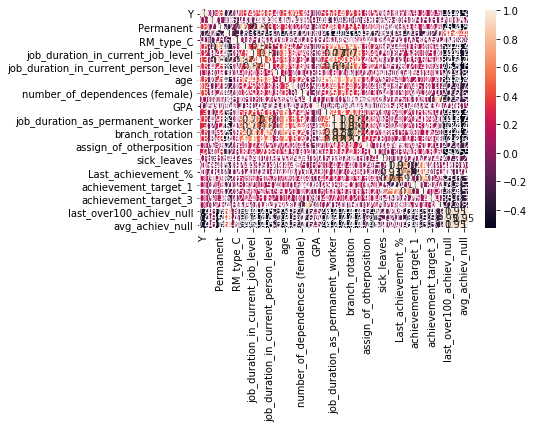

In [422]:
sns.heatmap(x.corr(), annot=True)

In [423]:
correlation.columns

Index(['Y', 'Male', 'Permanent', 'RM_type_B', 'RM_type_C', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'Education_level', 'GPA',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'GPA_year_null',
       'last_over100_achiev_null', 'achieve_target_null', 'avg_achiev_null'],
      dtype='object')

In [424]:
def correlate(dataset, threshold):
    col_corr = set()
    correlation = dataset.corr()
    for i in range(len(correlation.columns)):
        for j in range(i):
            if correlation.iloc[i,j] > threshold:
                col_corr.add(correlation.columns[i])
    return col_corr

In [425]:
correlated = correlate(x, 0.9)

In [426]:
correlated

{'Last_achievement_%',
 'achieve_target_null',
 'avg_achiev_null',
 'job_duration_from_training'}

In [427]:
correlation["job_duration_from_training"]

Y                                        0.316831
Male                                    -0.099538
Permanent                                0.251199
RM_type_B                               -0.399381
RM_type_C                                0.095962
job_level                                0.547674
job_duration_in_current_job_level        0.767836
person_level                             0.455446
job_duration_in_current_person_level     0.677521
job_duration_in_current_branch           0.162990
age                                      0.615379
number_of_dependences (male)             0.344743
number_of_dependences (female)           0.361393
Education_level                          0.095678
GPA                                     -0.074054
year_graduated                           0.416870
job_duration_as_permanent_worker         0.996729
job_duration_from_training               1.000000
branch_rotation                          0.878554
job_rotation                             0.815273


#### Mutual Info Classifier

In [428]:
from sklearn.feature_selection import mutual_info_classif

In [429]:
mutual_info = mutual_info_classif(x,y)

In [430]:
pd_mutual = pd.DataFrame(mutual_info, columns=["score"])

In [431]:
pd_mutual["feature"] = x.columns
pd_mutual = pd_mutual[["feature", "score"]].sort_values("score", ascending=False)

In [432]:
pd_mutual

,feature,score
19,job_rotation,0.021075
16,job_duration_as_permanent_worker,0.020219
8,job_duration_in_current_person_level,0.018878
6,job_duration_in_current_job_level,0.016598
17,job_duration_from_training,0.016496
5,job_level,0.015179
2,Permanent,0.014778
32,avg_achiev_null,0.013236
7,person_level,0.011765
9,job_duration_in_current_branch,0.011573


#### Variance Threshold

In [433]:
from sklearn.feature_selection import VarianceThreshold

In [434]:
var_threshold = VarianceThreshold(threshold=0.04)
var_threshold.fit(x)

VarianceThreshold(threshold=0.04)

In [435]:
var_threshold.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [436]:
index = []
for i in range(len(var_threshold.get_support())):
    if var_threshold.get_support()[i] == False:
        index.append(i)
index

[4, 23]

In [437]:
x.columns[index]

Index(['RM_type_C', 'Avg_achievement_%'], dtype='object')

In [438]:
df_copy

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null,Best Performance
0,1,0,1,0,0,3,8.00,5,8.00,0.50,...,0.7253,0.0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,2,5.17,4,2.00,1.25,...,1.0113,3.0,0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.7130,0.0,1,0,1,0,0,0,0,0
3,1,1,1,0,0,2,7.92,4,4.00,0.17,...,0.9009,2.0,0,3,1,0,0,0,0,0
4,1,1,1,0,0,2,1.83,3,1.83,2.08,...,1.0072,2.0,3,4,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,1,0,2,1.50,3,1.50,3.42,...,0.7553,0.0,0,3,0,0,0,0,0,0
22001,0,1,0,1,0,1,0.42,0,0.42,0.42,...,0.7141,0.0,0,0,0,0,1,1,1,0
22002,1,1,1,0,0,2,1.50,3,1.50,0.00,...,1.1165,3.0,0,3,0,0,0,0,0,0
22003,1,1,1,0,0,2,1.50,3,1.50,0.00,...,0.7965,0.0,1,3,1,0,0,0,0,0


### Feature Selection 1

In [439]:
df_copy_selected = df_copy.copy()

In [440]:
df_copy_selected.columns

Index(['Y', 'Male', 'Permanent', 'RM_type_B', 'RM_type_C', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'Education_level', 'GPA',
       'year_graduated', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3', 'GPA_year_null',
       'last_over100_achiev_null', 'achieve_target_null', 'avg_achiev_null',
       'Best Performance'],
      dtype='object')

In [441]:
# Feature selection after independent correlation analysis
df_copy_selected.drop("Avg_achievement_%", axis=1, inplace=True)
df_copy_selected.drop("achieve_target_null", axis=1, inplace=True)
df_copy_selected.drop("last_over100_achiev_null", axis=1, inplace=True)
df_copy_selected.drop("job_duration_from_training", axis=1, inplace=True)

In [442]:
len(df_copy_selected.columns)

30

In [443]:
# Feature selection after feature importance analysis
df_copy_selected.drop("RM_type_C", axis=1, inplace=True)
df_copy_selected.drop("Male", axis=1, inplace=True)
df_copy_selected.drop("Education_level", axis=1, inplace=True)
#df_copy_selected.drop("GPA_year_null", axis=1, inplace=True)

In [444]:
print(df_copy_selected.columns)
print(len(df_copy_selected.columns))

Index(['Y', 'Permanent', 'RM_type_B', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3',
       'GPA_year_null', 'avg_achiev_null', 'Best Performance'],
      dtype='object')
27


In [445]:
df_copy_selected.to_csv("cleaned_data3_selected1_corr90.csv", index=False)

### TEST DATASET 3

In [446]:
test_copy_selected = pd.read_csv("cleaned_test2.csv")

In [447]:
test_copy_selected

,Y,Male,Permanent,RM_type_B,RM_type_C,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,...,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,last_over100_achiev_null,achieve_target_null,avg_achiev_null
0,1,0,1,0,1,3,1.42,2,1.42,0.50,...,0.795067,0.9417,1.0,0,0,0,0,0,0,0
1,0,1,1,0,0,2,1.58,3,1.58,2.00,...,0.542833,0.4297,0.0,3,0,0,0,0,0,0
2,1,1,1,0,0,2,1.83,3,1.83,1.50,...,0.430167,0.4428,0.0,0,0,0,0,0,0,0
3,1,1,1,0,0,3,8.00,5,5.00,1.50,...,0.743900,0.8093,0.0,0,0,1,0,0,0,0
4,1,0,1,0,0,2,1.92,3,1.92,0.50,...,1.063767,1.0909,3.0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,1,1,0,1,2.75,0,2.75,2.75,...,0.493967,0.5071,0.0,0,0,1,0,0,0,0
5996,1,1,1,1,0,2,1.17,3,1.17,0.50,...,0.765900,0.7770,0.0,0,0,0,0,0,0,0
5997,1,1,1,0,0,2,1.83,3,1.83,1.92,...,0.979067,1.1149,3.0,1,2,0,0,0,0,0
5998,1,1,1,0,0,2,1.92,3,1.92,1.25,...,0.828333,0.8164,0.0,1,3,1,0,0,0,0


In [448]:
# Feature selection after independent correlation analysis
test_copy_selected.drop("Avg_achievement_%", axis=1, inplace=True)
test_copy_selected.drop("achieve_target_null", axis=1, inplace=True)
test_copy_selected.drop("last_over100_achiev_null", axis=1, inplace=True)
test_copy_selected.drop("job_duration_from_training", axis=1, inplace=True)

# Feature selection after feature importance analysis
test_copy_selected.drop("RM_type_C", axis=1, inplace=True)
test_copy_selected.drop("Male", axis=1, inplace=True)
test_copy_selected.drop("Education_level", axis=1, inplace=True)

In [449]:
df_copy_selected = pd.read_csv("cleaned_data3_selected1_corr90.csv")
df_copy_selected

,Y,Permanent,RM_type_B,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences (male),...,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,avg_achiev_null,Best Performance
0,1,1,0,3,8.00,5,8.00,0.50,32,1,...,8,0,0.7253,0.0,0,0,0,0,0,0
1,1,1,0,2,5.17,4,2.00,1.25,12,2,...,3,0,1.0113,3.0,0,3,0,0,0,0
2,1,1,0,2,1.83,3,1.83,1.50,20,0,...,6,0,0.7130,0.0,1,0,1,0,0,0
3,1,1,0,2,7.92,4,4.00,0.17,22,0,...,3,0,0.9009,2.0,0,3,1,0,0,0
4,1,1,0,2,1.83,3,1.83,2.08,22,0,...,2,1,1.0072,2.0,3,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,2,1.50,3,1.50,3.42,14,0,...,2,0,0.7553,0.0,0,3,0,0,0,0
22001,0,0,1,1,0.42,0,0.42,0.42,7,0,...,0,0,0.7141,0.0,0,0,0,0,1,0
22002,1,1,0,2,1.50,3,1.50,0.00,16,0,...,3,2,1.1165,3.0,0,3,0,0,0,0
22003,1,1,0,2,1.50,3,1.50,0.00,15,0,...,13,0,0.7965,0.0,1,3,1,0,0,0


In [450]:
df_copy_selected.columns[:-1]

Index(['Y', 'Permanent', 'RM_type_B', 'job_level',
       'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences (male)',
       'number_of_dependences (female)', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3',
       'GPA_year_null', 'avg_achiev_null'],
      dtype='object')

In [451]:
test_copy_selected = test_copy_selected[df_copy_selected.columns[:-1]]

In [452]:
test_copy_selected.to_csv("cleaned_test2_selected1_corr90.csv", index=False)

In [453]:
df_copy_selected

,Y,Permanent,RM_type_B,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences (male),...,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,avg_achiev_null,Best Performance
0,1,1,0,3,8.00,5,8.00,0.50,32,1,...,8,0,0.7253,0.0,0,0,0,0,0,0
1,1,1,0,2,5.17,4,2.00,1.25,12,2,...,3,0,1.0113,3.0,0,3,0,0,0,0
2,1,1,0,2,1.83,3,1.83,1.50,20,0,...,6,0,0.7130,0.0,1,0,1,0,0,0
3,1,1,0,2,7.92,4,4.00,0.17,22,0,...,3,0,0.9009,2.0,0,3,1,0,0,0
4,1,1,0,2,1.83,3,1.83,2.08,22,0,...,2,1,1.0072,2.0,3,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,2,1.50,3,1.50,3.42,14,0,...,2,0,0.7553,0.0,0,3,0,0,0,0
22001,0,0,1,1,0.42,0,0.42,0.42,7,0,...,0,0,0.7141,0.0,0,0,0,0,1,0
22002,1,1,0,2,1.50,3,1.50,0.00,16,0,...,3,2,1.1165,3.0,0,3,0,0,0,0
22003,1,1,0,2,1.50,3,1.50,0.00,15,0,...,13,0,0.7965,0.0,1,3,1,0,0,0


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

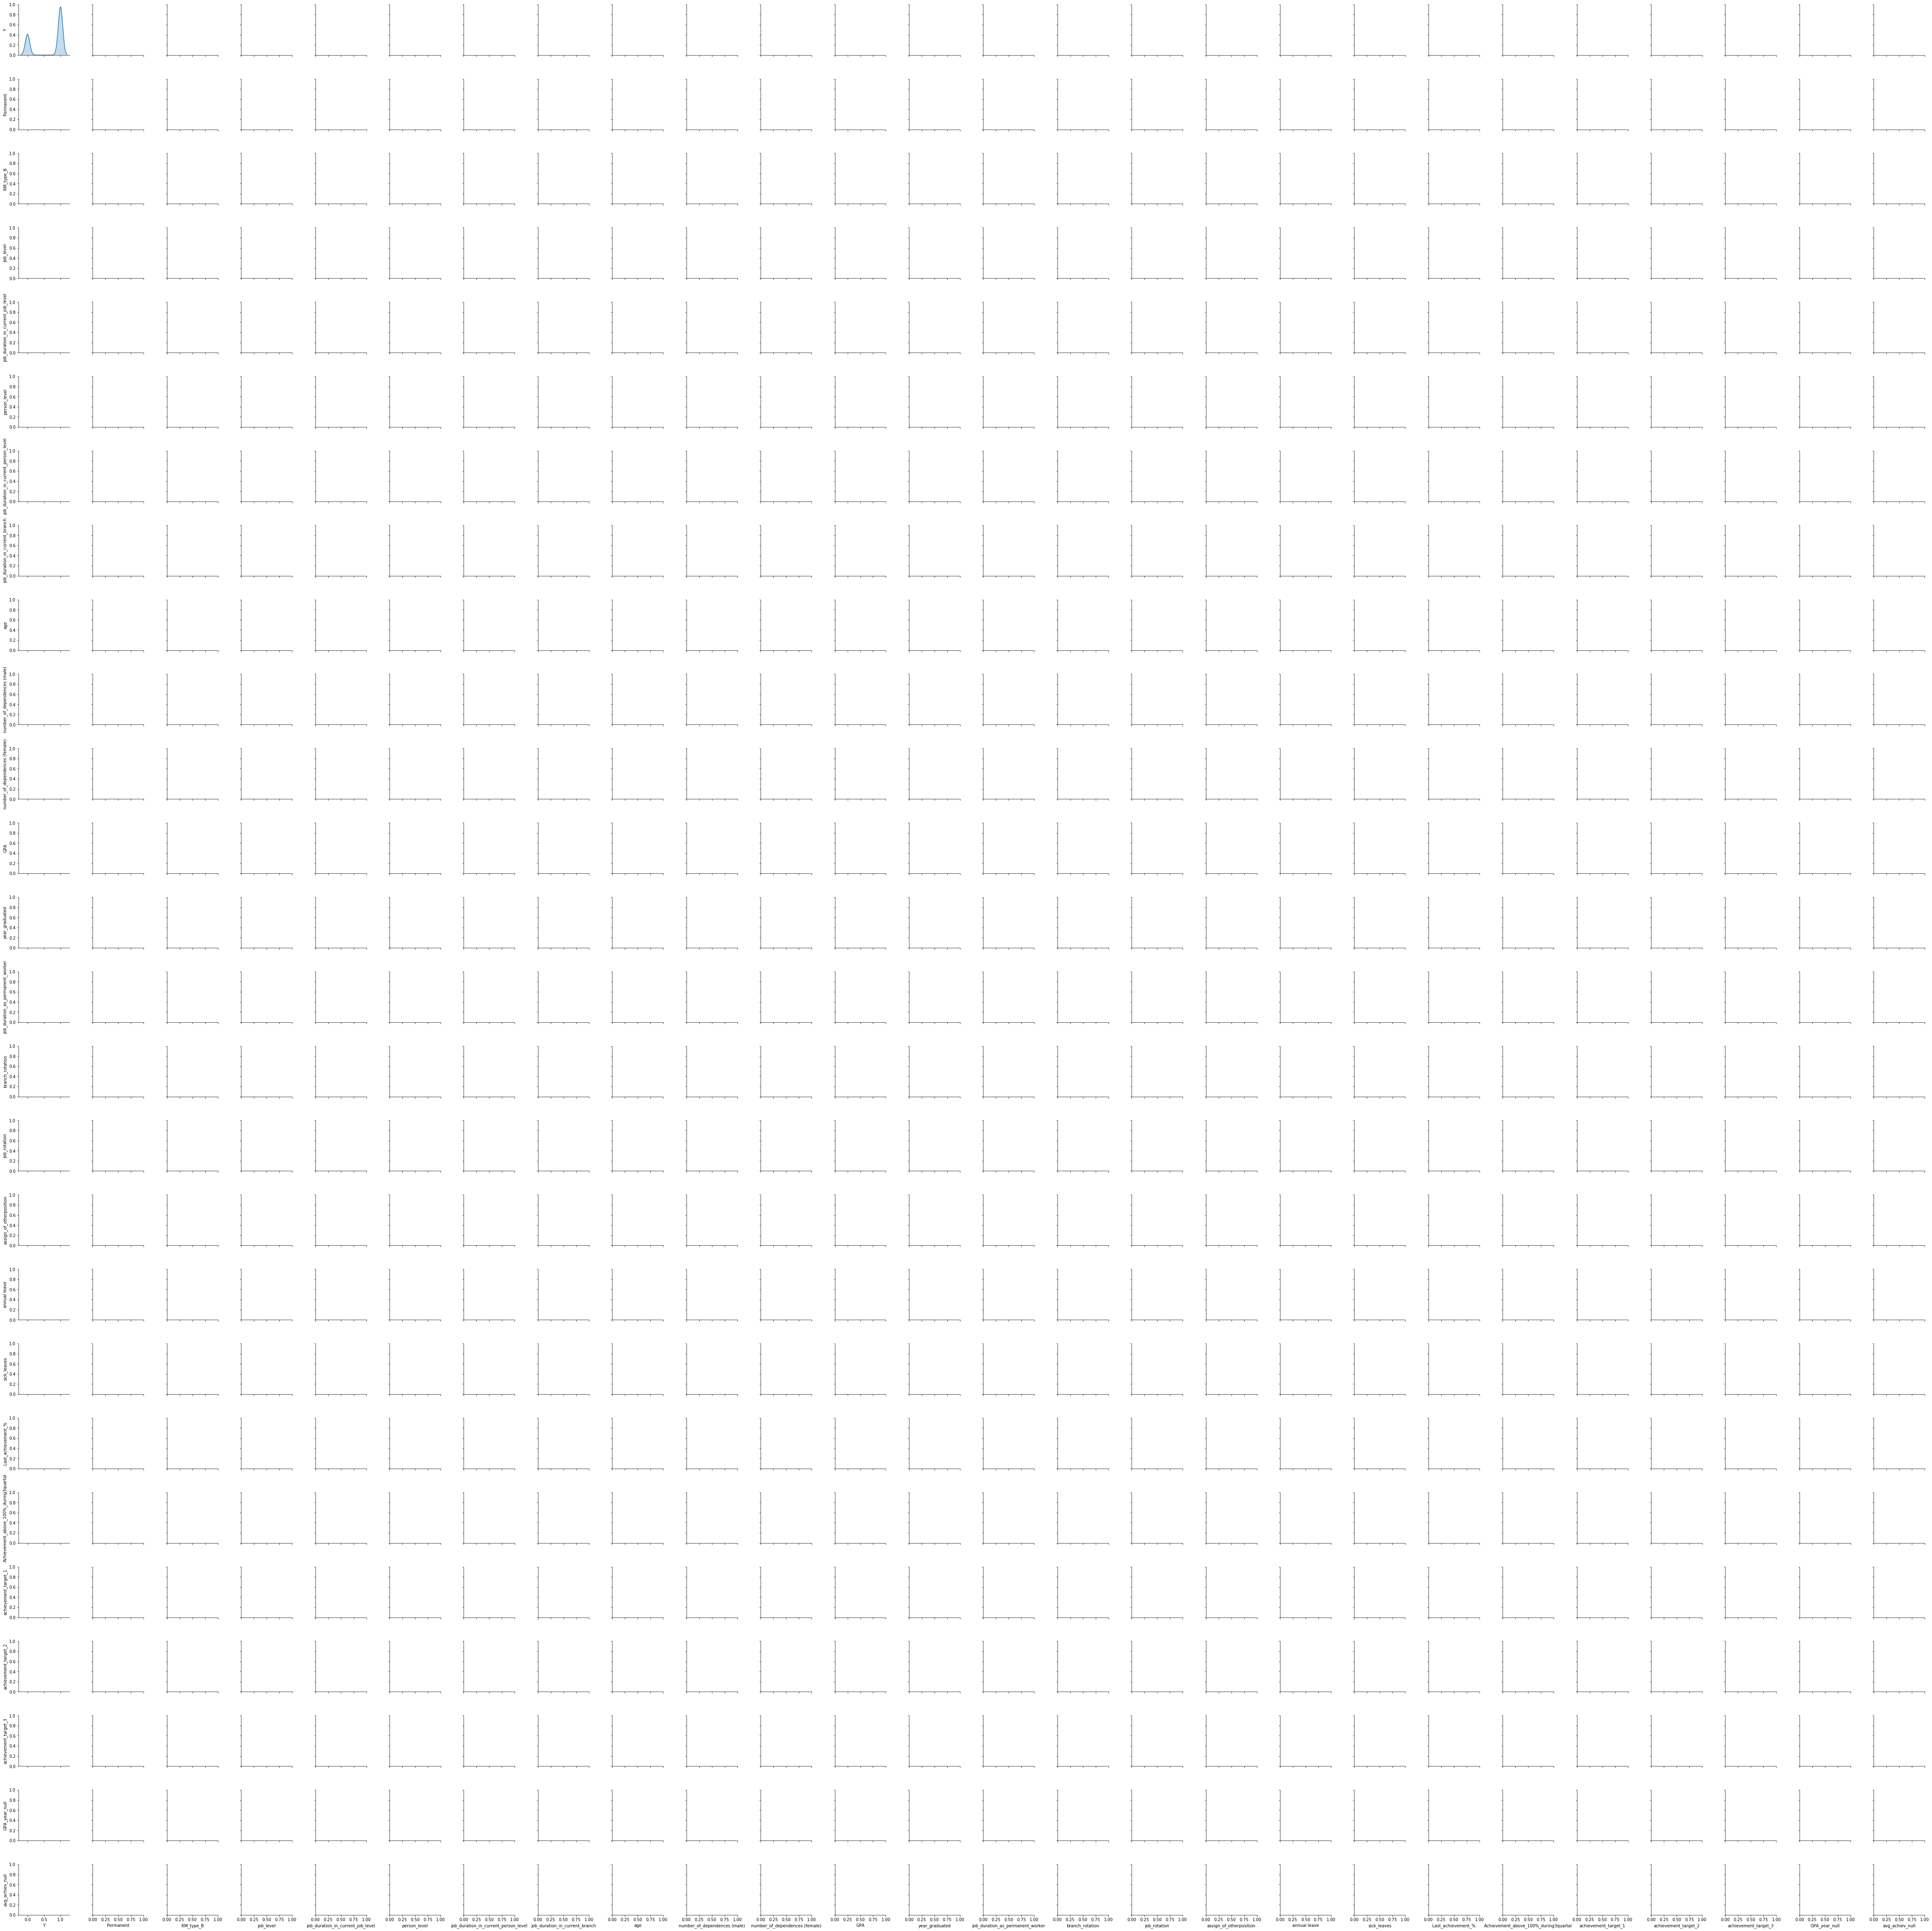

In [454]:
sns.pairplot(df_copy_selected, hue="Best Performance")

In [457]:
scaler = StandardScaler().fit(df_copy_selected.drop("Best Performance", axis=1))

In [458]:
scaled_data = scaler.transform(df_copy_selected.drop("Best Performance", axis=1))

In [459]:
scaled_data

array([[ 0.63660203,  0.32094784, -0.93047257, ..., -0.49231905,
        -0.43512169, -0.63258631],
       [ 0.63660203,  0.32094784, -0.93047257, ..., -0.49231905,
        -0.43512169, -0.63258631],
       [ 0.63660203,  0.32094784, -0.93047257, ...,  2.03120313,
        -0.43512169, -0.63258631],
       ...,
       [ 0.63660203,  0.32094784, -0.93047257, ..., -0.49231905,
        -0.43512169, -0.63258631],
       [ 0.63660203,  0.32094784, -0.93047257, ...,  2.03120313,
        -0.43512169, -0.63258631],
       [ 0.63660203,  0.32094784,  1.0747227 , ..., -0.49231905,
         2.29820767, -0.63258631]])

In [460]:
scaled_df = pd.DataFrame(scaled_data, columns=df_copy_selected.columns[:-1])

In [461]:
scaled_df

,Y,Permanent,RM_type_B,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences (male),...,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,avg_achiev_null
0,0.636602,0.320948,-0.930473,2.946461,4.406676,2.301869,6.750959,-0.700356,3.209493,1.022771,...,-0.363855,1.844508,-0.315281,0.054645,-0.494580,-0.528896,-0.529332,-0.492319,-0.435122,-0.632586
1,0.636602,0.320948,-0.930473,0.146820,2.416666,1.256342,0.465595,0.192647,-0.264782,2.670361,...,3.635902,0.072940,-0.315281,1.459764,2.549683,-0.528896,1.805551,-0.492319,-0.435122,-0.632586
2,0.636602,0.320948,-0.930473,0.146820,0.068032,0.210816,0.287510,0.490315,1.124928,-0.624819,...,-0.363855,1.135880,-0.315281,-0.005785,-0.494580,0.463460,-0.529332,2.031203,-0.435122,-0.632586
3,0.636602,0.320948,-0.930473,0.146820,4.350421,1.256342,2.560716,-1.093278,1.472356,-0.624819,...,-0.363855,0.072940,-0.315281,0.917368,1.534928,-0.528896,1.805551,2.031203,-0.435122,-0.632586
4,0.636602,0.320948,-0.930473,0.146820,0.068032,0.210816,0.287510,1.180904,1.472356,-0.624819,...,4.524736,-0.281374,0.035785,1.439620,1.534928,2.448171,2.583845,2.031203,2.298208,-0.632586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,0.636602,0.320948,1.074723,0.146820,-0.164019,0.210816,-0.058185,2.776402,0.082645,-0.624819,...,-0.363855,-0.281374,-0.315281,0.202035,-0.494580,-0.528896,1.805551,-0.492319,-0.435122,-0.632586
22001,-1.570840,-3.115771,1.074723,-2.652820,-0.923457,-2.925764,-1.189551,-0.795610,-1.133351,-0.624819,...,-0.363855,-0.990001,-0.315281,-0.000380,-0.494580,-0.528896,-0.529332,-0.492319,-0.435122,1.580812
22002,0.636602,0.320948,-0.930473,0.146820,-0.164019,0.210816,-0.058185,-1.295692,0.430073,-0.624819,...,-0.363855,0.072940,0.386850,1.976611,2.549683,-0.528896,1.805551,-0.492319,-0.435122,-0.632586
22003,0.636602,0.320948,-0.930473,0.146820,-0.164019,0.210816,-0.058185,-1.295692,0.256359,-0.624819,...,-0.363855,3.616075,-0.315281,0.404451,-0.494580,0.463460,1.805551,2.031203,-0.435122,-0.632586


In [462]:
scaled_df["Best Performance"] = df_copy_selected["Best Performance"]

In [463]:
scaled_df

,Y,Permanent,RM_type_B,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences (male),...,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,avg_achiev_null,Best Performance
0,0.636602,0.320948,-0.930473,2.946461,4.406676,2.301869,6.750959,-0.700356,3.209493,1.022771,...,1.844508,-0.315281,0.054645,-0.494580,-0.528896,-0.529332,-0.492319,-0.435122,-0.632586,0
1,0.636602,0.320948,-0.930473,0.146820,2.416666,1.256342,0.465595,0.192647,-0.264782,2.670361,...,0.072940,-0.315281,1.459764,2.549683,-0.528896,1.805551,-0.492319,-0.435122,-0.632586,0
2,0.636602,0.320948,-0.930473,0.146820,0.068032,0.210816,0.287510,0.490315,1.124928,-0.624819,...,1.135880,-0.315281,-0.005785,-0.494580,0.463460,-0.529332,2.031203,-0.435122,-0.632586,0
3,0.636602,0.320948,-0.930473,0.146820,4.350421,1.256342,2.560716,-1.093278,1.472356,-0.624819,...,0.072940,-0.315281,0.917368,1.534928,-0.528896,1.805551,2.031203,-0.435122,-0.632586,0
4,0.636602,0.320948,-0.930473,0.146820,0.068032,0.210816,0.287510,1.180904,1.472356,-0.624819,...,-0.281374,0.035785,1.439620,1.534928,2.448171,2.583845,2.031203,2.298208,-0.632586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,0.636602,0.320948,1.074723,0.146820,-0.164019,0.210816,-0.058185,2.776402,0.082645,-0.624819,...,-0.281374,-0.315281,0.202035,-0.494580,-0.528896,1.805551,-0.492319,-0.435122,-0.632586,0
22001,-1.570840,-3.115771,1.074723,-2.652820,-0.923457,-2.925764,-1.189551,-0.795610,-1.133351,-0.624819,...,-0.990001,-0.315281,-0.000380,-0.494580,-0.528896,-0.529332,-0.492319,-0.435122,1.580812,0
22002,0.636602,0.320948,-0.930473,0.146820,-0.164019,0.210816,-0.058185,-1.295692,0.430073,-0.624819,...,0.072940,0.386850,1.976611,2.549683,-0.528896,1.805551,-0.492319,-0.435122,-0.632586,0
22003,0.636602,0.320948,-0.930473,0.146820,-0.164019,0.210816,-0.058185,-1.295692,0.256359,-0.624819,...,3.616075,-0.315281,0.404451,-0.494580,0.463460,1.805551,2.031203,-0.435122,-0.632586,0


In [464]:
sns.pairplot(scaled_df, hue="Best Performance")

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

Error in callback <function flush_figures at 0x0000028A829855E8> (for post_execute):


KeyboardInterrupt: 

### Data Oversampling

In [465]:
from imblearn.over_sampling import RandomOverSampler

In [466]:
dataset = pd.read_csv("cleaned_data3_selected1_corr90.csv")
dataset

,Y,Permanent,RM_type_B,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences (male),...,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA_year_null,avg_achiev_null,Best Performance
0,1,1,0,3,8.00,5,8.00,0.50,32,1,...,8,0,0.7253,0.0,0,0,0,0,0,0
1,1,1,0,2,5.17,4,2.00,1.25,12,2,...,3,0,1.0113,3.0,0,3,0,0,0,0
2,1,1,0,2,1.83,3,1.83,1.50,20,0,...,6,0,0.7130,0.0,1,0,1,0,0,0
3,1,1,0,2,7.92,4,4.00,0.17,22,0,...,3,0,0.9009,2.0,0,3,1,0,0,0
4,1,1,0,2,1.83,3,1.83,2.08,22,0,...,2,1,1.0072,2.0,3,4,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,1,1,1,2,1.50,3,1.50,3.42,14,0,...,2,0,0.7553,0.0,0,3,0,0,0,0
22001,0,0,1,1,0.42,0,0.42,0.42,7,0,...,0,0,0.7141,0.0,0,0,0,0,1,0
22002,1,1,0,2,1.50,3,1.50,0.00,16,0,...,3,2,1.1165,3.0,0,3,0,0,0,0
22003,1,1,0,2,1.50,3,1.50,0.00,15,0,...,13,0,0.7965,0.0,1,3,1,0,0,0


In [467]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [468]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [469]:
#"n_estimators": [2, 5, 25, 50, 100]
#'max_depth':range(1,7,2), 
#'min_samples_split':range(100,200,50)
#'min_samples_leaf':range(10,41,5),
#'max_features':range(6,12,1),
#'subsample': [0.6,0.7,0.75,0.8,0.85,0.9],
#"learning_rate": [0.005, 0.01, 0.05, 0.1, 0.2], 

In [470]:
param_test = {"n_estimators": [2, 5, 25, 50, 100]}

gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                              max_depth=5,
                                                              min_samples_split=75,
                                                              min_samples_leaf=14,
                                                              max_features="sqrt",
                                                              subsample=0.8,
                                                              random_state=10), 
                        param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=10)
gsearch.fit(x_train.values, y_train.values.ravel())
print(gsearch.best_params_)
print(gsearch.best_score_)

KeyboardInterrupt: 

In [471]:
clf = GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth=5,
                                    min_samples_split=75,
                                    min_samples_leaf=14,
                                    max_features="sqrt",
                                    n_estimators=100,   
                                    subsample=0.8, 
                                    random_state=10).fit(x_train.values, y_train.values.ravel())

In [472]:
cross_val_score(clf, x_train, y_train, cv=10, scoring='roc_auc')

array([0.69539936, 0.64896243, 0.66790461, 0.62576436, 0.6546096 ,
       0.67578739, 0.65567177, 0.64877231, 0.66128852, 0.70310761])

In [473]:
sampler = RandomOverSampler(0.5)

E:\anaconda\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [474]:
x_train_over, y_train_over = sampler.fit_sample(x_train, y_train)

In [475]:
clf = GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth=5,
                                    min_samples_split=75,
                                    min_samples_leaf=14,
                                    max_features="sqrt",
                                    n_estimators=100,   
                                    subsample=0.8, 
                                    random_state=10).fit(x_train_over, y_train_over)

In [476]:
dtrain_predprob = clf.predict_proba(x_test)[:,1]

In [477]:
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))

AUC Score (Train): 0.664062


In [478]:
def modelfit_best3(performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
    clf = GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth=5,
                                    min_samples_split=75,
                                    min_samples_leaf=14,
                                    max_features="sqrt",
                                    n_estimators=100,   
                                    subsample=0.8, 
                                    random_state=10).fit(x_train_over, y_train_over)
        
    #Predict training set:
    dtrain_predictions = clf.predict(x_test)
    dtrain_predprob = clf.predict_proba(x_test)[:,1]
    print(dtrain_predprob)
    #Perform cross-validation:
    #if performCV:
        #cv_score = cross_val_score(clf, x_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

modelfit_best3()

[0.36006082 0.01879106 0.28064344 ... 0.00892914 0.0193677  0.37374602]

Model Report
Accuracy : 0.8505
AUC Score (Train): 0.664062


NameError: name 'cv_score' is not defined

In [23]:
print(label[label==1].count())
print(label[label==0].count())
print(y_train[y_train==1].count())
print(y_train[y_train==0].count())

2668
19337
19337
19337


In [479]:
test_copy = pd.read_csv("cleaned_test2_selected1_corr90.csv")

In [480]:
clf.predict_proba(test_copy.values)[:, 1]

array([0.18239052, 0.30839512, 0.42958392, ..., 0.405472  , 0.56385185,
       0.29465584])

In [481]:
test_predprob = clf.predict_proba(test_copy.values)[:,1]

In [482]:
submission_df = pd.DataFrame(test_predprob, columns=["Best Performance"])
submission_df

,Best Performance
0,0.182391
1,0.308395
2,0.429584
3,0.384795
4,0.268607
...,...
5995,0.415360
5996,0.358930
5997,0.405472
5998,0.563852


In [483]:
submission_df["index"] = [i for i in range(6000)]

In [484]:
submission_df = submission_df[["index", "Best Performance"]]

In [485]:
submission_df

,index,Best Performance
0,0,0.182391
1,1,0.308395
2,2,0.429584
3,3,0.384795
4,4,0.268607
...,...,...
5995,5995,0.415360
5996,5996,0.358930
5997,5997,0.405472
5998,5998,0.563852


In [486]:
submission_df.to_csv("submission4.csv", index=False)